https://covidtracking.com/data/download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv('https://covidtracking.com/api/v1/states/ga/daily.csv')
dfUnfiltered = pd.read_csv('https://covidtracking.com/api/v1/us/daily.csv')
dfUnfiltered.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200709,56,3101339,34931627,2530.0,43895.0,255253.0,5839.0,11370.0,2127.0,...,2020-07-09T00:00:00Z,38035496,38032966,38032966,867,1719,578464,58836,637300,cf10aef539ecb665c78e84ba56568f155b2a3411
1,20200708,56,3042503,34353163,2360.0,43004.0,253534.0,5867.0,11303.0,2172.0,...,2020-07-08T00:00:00Z,37398026,37395666,37395666,897,2035,564523,62147,626670,f18b5341612ca6e29534a5889bf29c553653ea02
2,20200707,56,2980356,33788640,2136.0,41700.0,251499.0,5826.0,11177.0,2098.0,...,2020-07-07T00:00:00Z,36771132,36768996,36768996,922,1960,581455,51766,633221,fc166aafb9add554f11c450b848bee5601cab6b9
3,20200706,56,2928590,33207185,1907.0,39749.0,249539.0,5680.0,11058.0,2105.0,...,2020-07-06T00:00:00Z,36137682,36135775,36135775,242,794,472521,47430,519951,0d7619deb2079a52b3fa38d8adfee60f779d011f
4,20200705,56,2881160,32734664,1885.0,38734.0,248745.0,5652.0,11010.0,2080.0,...,2020-07-05T00:00:00Z,35617709,35615824,35615824,209,590,614306,42602,656908,cb12b1705ba2d3589b5941da9133bdb57e4fbbf7


In [3]:
# Check columns included, if needed
#dfUnfiltered.columns

In [4]:
# Define the dataframe as a subset of columns
cols = {'date', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease'}
df = dfUnfiltered[cols]

In [5]:
# Remove the early data, prior to there being no reported positive tests
df = df[df['positiveIncrease']/df['totalTestResultsIncrease'] < 0.4]
df.head(200)

,deathIncrease,totalTestResultsIncrease,positiveIncrease,date
0,867,637300,58836,20200709
1,897,626670,62147,20200708
2,922,633221,51766,20200707
3,242,519951,47430,20200706
4,209,656908,42602,20200705
...,...,...,...,...
123,4,874,267,20200308
124,1,798,220,20200307
125,6,786,141,20200306
126,4,617,153,20200305


In [6]:
# Check for data anomolies (negative number of test results)
df[df['totalTestResultsIncrease']<=0]

,deathIncrease,totalTestResultsIncrease,positiveIncrease,date


In [7]:
# Anomoly handler for negative totalTestResultsIncrease on May 27
zeroIndexes = df[df['totalTestResultsIncrease']<=0].index
df.at[zeroIndexes, 'totalTestResultsIncrease'] = np.nan

In [8]:
# Define the x-axis and convert date strings to date type
x = pd.to_datetime(df['date'], format='%Y%m%d').to_numpy()

In [9]:
# Define the y-axes
y1 = df['positiveIncrease'].to_numpy()
y2 = df['totalTestResultsIncrease'].to_numpy()
y3 = df['deathIncrease'].to_numpy()
y = np.divide(y1, y2)*100

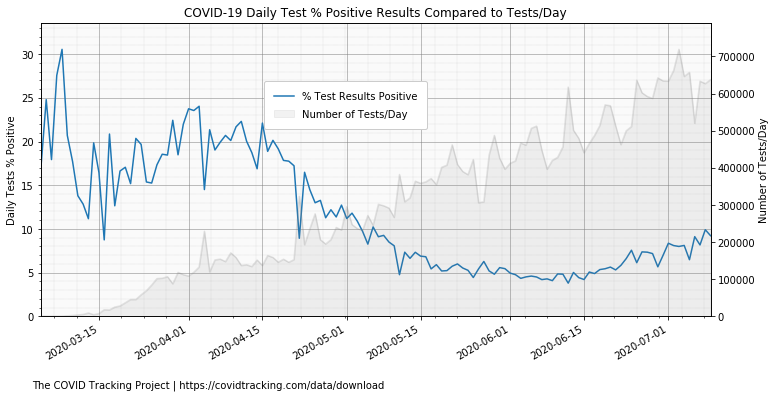

In [10]:
fig, axis1 = plt.subplots(constrained_layout=False, figsize=(12,6))
axis1.plot(x, y, label='% Test Results Positive')
fig.autofmt_xdate()
axis1.set_facecolor('#FAFAFA')
axis1.set_xlabel('')
axis1.set_ylabel('Daily Tests % Positive')
axis1.set_title('COVID-19 Daily Test % Positive Results Compared to Tests/Day')
axis1.set_xlim(min(x), max(x))
axis1.set_ylim(0, max(y)*1.1)
axis1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
axis1.minorticks_on()
axis1.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')

axis2 = axis1.twinx()
axis2.fill_between( x, y2, color="gray", alpha=0.1, label='Number of Tests/Day')
axis2.plot(x,y2,color='gray', alpha=0.2)
axis2.set_ylabel('Number of Tests/Day')
axis2.set_xlim(min(x), max(x))
axis2.set_ylim(0, max(y2)*1.1)

fig.legend(bbox_to_anchor=(0.5, 0.75), borderpad=1, framealpha=1, labelspacing=0.8)

annotation = axis1.annotate(
    'The COVID Tracking Project | https://covidtracking.com/data/download',
    xy=(0.25, 0), xytext=(0, 10),
    xycoords=('axes fraction', 'figure fraction'),
    textcoords='offset points',
    size=10, ha='center', va='bottom'
)

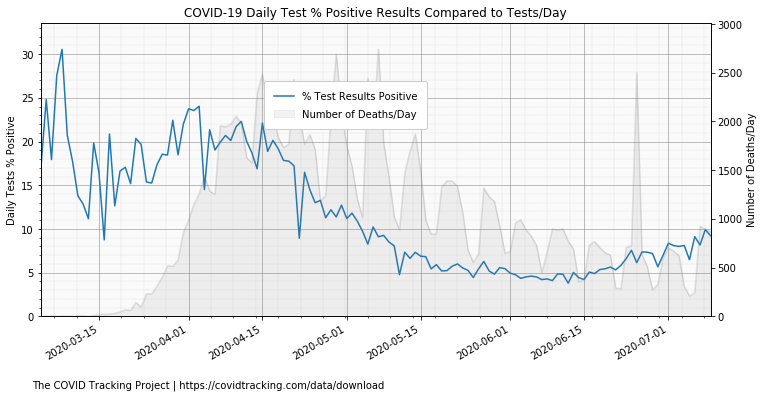

In [11]:
fig, axis1 = plt.subplots(constrained_layout=False, figsize=(12,6))
axis1.plot(x, y, label='% Test Results Positive')
fig.autofmt_xdate()
axis1.set_facecolor('#FAFAFA')
axis1.set_xlabel('')
axis1.set_ylabel('Daily Tests % Positive')
axis1.set_title('COVID-19 Daily Test % Positive Results Compared to Tests/Day')
axis1.set_xlim(min(x), max(x))
axis1.set_ylim(0, max(y)*1.1)
axis1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
axis1.minorticks_on()
axis1.grid(which='minor', linestyle=':', linewidth='0.2', color='gray')

axis2 = axis1.twinx()
axis2.fill_between( x, y3, color="gray", alpha=0.1, label='Number of Deaths/Day')
axis2.plot(x, y3, color='gray', alpha=0.2)
axis2.set_ylabel('Number of Deaths/Day')
axis2.set_xlim(min(x), max(x))
axis2.set_ylim(0, max(y3)*1.1)

fig.legend(bbox_to_anchor=(0.5, 0.75), borderpad=1, framealpha=1, labelspacing=0.8)

annotation = axis1.annotate(
    'The COVID Tracking Project | https://covidtracking.com/data/download',
    xy=(0.25, 0), xytext=(0, 10),
    xycoords=('axes fraction', 'figure fraction'),
    textcoords='offset points',
    size=10, ha='center', va='bottom'
)